Internship on "Full Stack Data Science" at InfraBIM Techno Solutions DS-09: Project - Loan Eligibility Prediction

Internship Reg. No.:3136

Name:Kollibetti Ganesh

Date:22/01/2023

Other Team Members: (Reg.No. - Name)

1.1001-PEDDIREDDY.VIVEK REDDY

2.3048-ETTIREDDY SUMANTH REDDY

3.1027-S.LAVAN KARTHIK

Table of Contents

1.Introduction

2.Import Packages

3.Load Dataset

4.Exploratory Data Analysis (EDA)

5.Model Selection and Evaluation

6.Create Pickle file

7.Conclusion

8.References

Introduction:

Loans are the core business of banks. The main profit comes directly from the loan’s interest. The loan companies grant a loan after an intensive process of verification and validation. However, they still don’t have assurance if the applicant is able to repay the loan with no difficulties.

In this tutorial, we’ll build a predictive model to predict if an applicant is able to repay the lending company or not. We will prepare the data using Jupyter Notebook and use various models to predict the target variable.

Problem Statement:TO PREDICT THE LOAN ELIGIBILITY


# Loan Eligibility Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing & Loading the dataset

In [2]:
df = pd.read_csv("https://internships-data.s3.ap-south-1.amazonaws.com/Projects/Data/Loan_Eligibility_Prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Dataset Info:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Dataset Shape:

In [4]:
df.shape

(614, 13)

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>]],
      dtype=object)

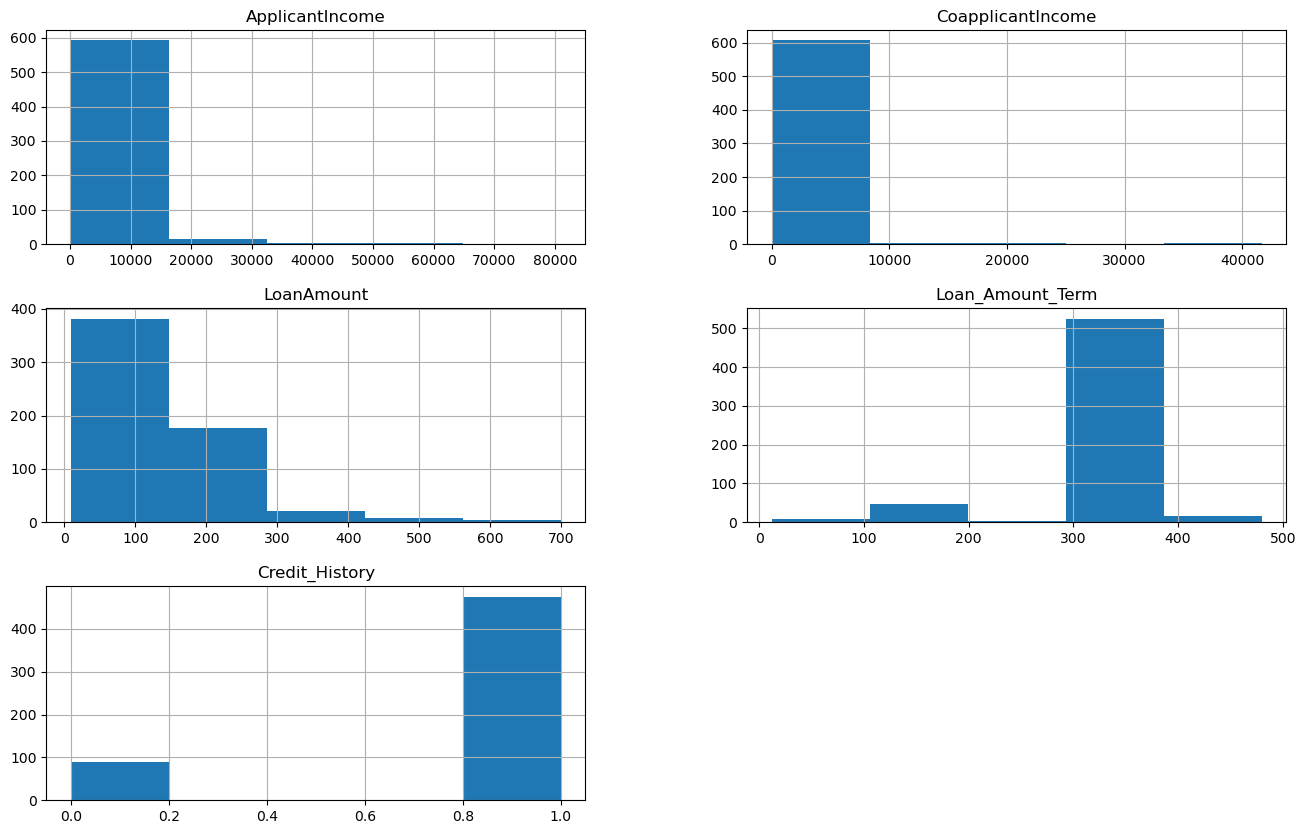

In [5]:
# Generate Histogram - It is a graphical representation of a grouped frequency distribution with continuous classes
df.hist(figsize=(16,10),bins=5)

## Data Cleaning

### Checking the Missing Values

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Now, Let's drop all the missing values remaining.

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
df.shape

(480, 13)

In [10]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### Exploratory Data Analyis
### Let's replace the Variable values to Numerical form & display the Value Counts

The data in Numerical form avoids disturbances in building the model. 

In [11]:
df['Loan_Status'].replace('Y',1,inplace=True)
df['Loan_Status'].replace('N',0,inplace=True)

In [12]:
df['Loan_Status'].value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

In [13]:
df.Gender=df.Gender.map({'Male':1,'Female':0})
df['Gender'].value_counts()

1    394
0     86
Name: Gender, dtype: int64

In [14]:
df.Married=df.Married.map({'Yes':1,'No':0})
df['Married'].value_counts()

1    311
0    169
Name: Married, dtype: int64

In [15]:
df.Dependents=df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df['Dependents'].value_counts()

0    274
2     85
1     80
3     41
Name: Dependents, dtype: int64

In [16]:
df.Education=df.Education.map({'Graduate':1,'Not Graduate':0})
df['Education'].value_counts()

1    383
0     97
Name: Education, dtype: int64

In [17]:
df.Self_Employed=df.Self_Employed.map({'Yes':1,'No':0})
df['Self_Employed'].value_counts()

0    414
1     66
Name: Self_Employed, dtype: int64

In [18]:
df.Property_Area=df.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
df['Property_Area'].value_counts()

1    191
2    150
0    139
Name: Property_Area, dtype: int64

In [19]:
df['LoanAmount'].value_counts()

120.0    13
100.0    13
110.0    13
187.0    12
128.0     9
         ..
280.0     1
240.0     1
214.0     1
59.0      1
253.0     1
Name: LoanAmount, Length: 186, dtype: int64

In [20]:
df['Loan_Amount_Term'].value_counts()

360.0    411
180.0     36
480.0     12
300.0      9
120.0      3
84.0       3
60.0       2
240.0      2
36.0       2
Name: Loan_Amount_Term, dtype: int64

In [21]:
df['Credit_History'].value_counts()

1.0    410
0.0     70
Name: Credit_History, dtype: int64

In [22]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [23]:
loan=df.drop(['Loan_ID'], axis=1)
loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


C:\Users\Ganesh.K\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ganesh.K\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ganesh.K\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ganesh.K\anac

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

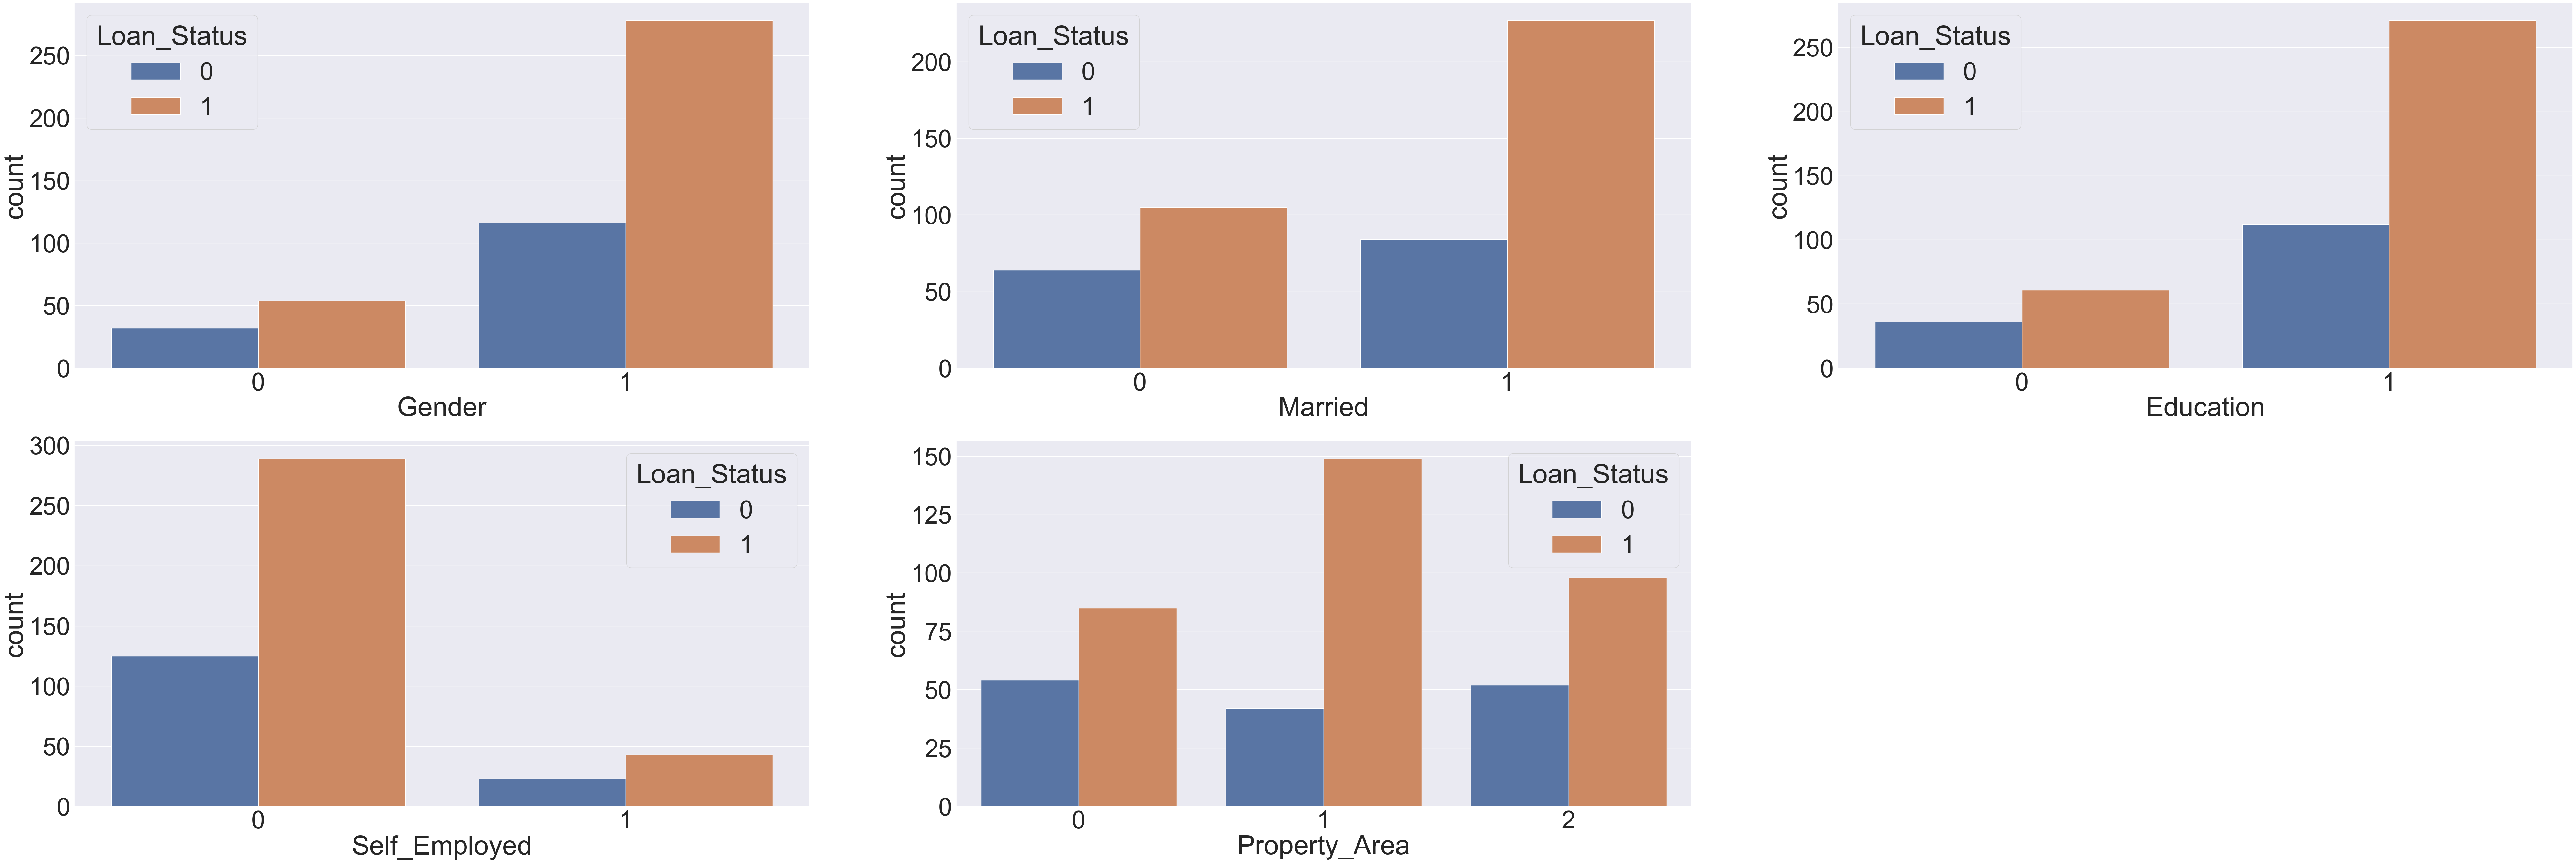

In [24]:
plt.figure(figsize = (100, 50))
sns.set(font_scale = 5)
plt.subplot(331)
sns.countplot(df['Gender'],hue=df['Loan_Status'])

plt.subplot(332)
sns.countplot(df['Married'],hue=df['Loan_Status'])

plt.subplot(333)
sns.countplot(df['Education'],hue=df['Loan_Status'])

plt.subplot(334)
sns.countplot(df['Self_Employed'],hue=df['Loan_Status'])

plt.subplot(335)
sns.countplot(df['Property_Area'],hue=df['Loan_Status'])


### Importing Packages for Classification algorithms

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Splitting the data into Train and Test set

In [26]:
x=df[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']]

In [27]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2


In [28]:
y=df['Loan_Status']
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0)

In [30]:
#understanding of Machine learning models from sklearn module.
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

classifiers = ['LogisticRegression', 'DecisionTreeClassifier', 
               'KNeighborsClassifier',  'RandomForestClassifier', 
               'LinearDiscriminantAnalysis',  'GaussianNB', 'SVC']

#Model Preparation
num_trees = 200
max_features = 3
models = []
models.append(('LR',LogisticRegression(multi_class='ovr')))
models.append(('DTC',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier(n_neighbors=10)))
models.append(('RF',RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(probability=True)))


In [31]:
model =RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [32]:
model.score(x_train,y_train)

1.0

In [33]:
model.predict([['1','1','1','1','0','4583','1508.0','128.0','360.0','1.0','0']])

C:\Users\Ganesh.K\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [34]:
# save the model
import pickle
pickle.dump(model, open("model.pkl", "wb"))

In [35]:
model = pickle.load(open("model.pkl", "rb"))
model

RandomForestClassifier()

In [36]:
model.predict([['1','1','1','1','0','4583','1508.0','128.0','360.0','1.0','0']])

C:\Users\Ganesh.K\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lr =LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\Ganesh.K\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
lr.score(x_train,y_train)

0.8154761904761905

In [40]:
lr.predict([['1','1','1','1','0','4583','1508.0','128.0','360.0','1.0','0']])

C:\Users\Ganesh.K\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Ganesh.K\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


array([1], dtype=int64)